Danh sách 1: Nhóm các môn Võ thuật, Đồng đội và các môn từ đợt đầu tiên
Bóng đá (Soccer/Football)
Bóng ném (Handball)
Bóng chuyền (Volleyball)
Khúc côn cầu trên băng (Ice Hockey)
Bóng bầu dục Úc (Australian Rules Football)
Judo
Taekwondo
Karate
Vovinam
Wushu
Kickboxing
Muay Thai
Đấu vật (Wrestling)
Võ tổng hợp (Mixed Martial Arts)
Đua xe đạp leo núi (Mountain Biking)

Danh sách 2: Nhóm các môn Cá nhân và Olympic từ đợt thứ hai
Bơi lội (Swimming)
Đạp xe (Cycling)
Điền kinh (Athletics)
Golf
Các môn thể thao dùng vợt (như Tennis, Cầu lông, Bóng bàn)
Thể dục dụng cụ (Gymnastics)
Nhảy sào (Pole vaulting)
Bắn súng (Shooting)
Đua thuyền buồm (Sailing)
Cưỡi ngựa (Equestrianism)

In [10]:
import pandas as pd

# Đọc dữ liệu từ file queryA.csv
df_a = pd.read_csv('queryA.csv')
# Đọc dữ liệu từ file queryB.csv
df_b = pd.read_csv('queryB.csv')

# --- Xử lý cho df_a ---
print("--- Xử lý file queryA.csv ---")
# Chuyển đổi sang kiểu datetime, các giá trị không hợp lệ sẽ thành NaT
df_a['dateOfBirth'] = pd.to_datetime(df_a['dateOfBirth'], errors='coerce')
df_a['dateOfDeath'] = pd.to_datetime(df_a['dateOfDeath'], errors='coerce')

# Loại bỏ các dòng có NaT ở dateOfBirth hoặc dateOfDeath
# Chỉ giữ lại những dòng có cả ngày sinh và ngày mất hợp lệ
df_a_cleaned = df_a.dropna(subset=['dateOfBirth', 'dateOfDeath']).copy()

# Tính longevity (tuổi thọ) sau khi đã làm sạch dữ liệu
df_a_cleaned['longevity'] = (df_a_cleaned['dateOfDeath'] - df_a_cleaned['dateOfBirth']).dt.days // 365
print(f"Số lượng dòng ban đầu (df_a): {len(df_a)}")
print(f"Số lượng dòng sau khi lọc ngày sinh/ngày mất (df_a_cleaned): {len(df_a_cleaned)}")
print(df_a_cleaned[['dateOfBirth', 'dateOfDeath', 'longevity']].head())
print(f"Tuổi thọ trung bình của file queryA.csv (sau khi lọc): {df_a_cleaned['longevity'].mean():.2f} năm\n")

# --- Xử lý cho df_b ---
print("--- Xử lý file queryB.csv ---")
# Chuyển đổi sang kiểu datetime, các giá trị không hợp lệ sẽ thành NaT
df_b['dateOfBirth'] = pd.to_datetime(df_b['dateOfBirth'], errors='coerce')
df_b['dateOfDeath'] = pd.to_datetime(df_b['dateOfDeath'], errors='coerce')

# Loại bỏ các dòng có NaT ở dateOfBirth hoặc dateOfDeath
# Chỉ giữ lại những dòng có cả ngày sinh và ngày mất hợp lệ
df_b_cleaned = df_b.dropna(subset=['dateOfBirth', 'dateOfDeath']).copy()

# Tính longevity (tuổi thọ) sau khi đã làm sạch dữ liệu
df_b_cleaned['longevity'] = (df_b_cleaned['dateOfDeath'] - df_b_cleaned['dateOfBirth']).dt.days // 365
print(f"Số lượng dòng ban đầu (df_b): {len(df_b)}")
print(f"Số lượng dòng sau khi lọc ngày sinh/ngày mất (df_b_cleaned): {len(df_b_cleaned)}")
print(df_b_cleaned[['dateOfBirth', 'dateOfDeath', 'longevity']].head())
print(f"Tuổi thọ trung bình của file queryB.csv (sau khi lọc): {df_b_cleaned['longevity'].mean():.2f} năm\n")

--- Xử lý file queryA.csv ---
Số lượng dòng ban đầu (df_a): 19550
Số lượng dòng sau khi lọc ngày sinh/ngày mất (df_a_cleaned): 19185
                dateOfBirth               dateOfDeath  longevity
0 1927-06-02 00:00:00+00:00 2020-08-04 00:00:00+00:00         93
1 1957-01-01 00:00:00+00:00 2020-08-08 00:00:00+00:00         63
2 1997-05-09 00:00:00+00:00 2021-02-11 00:00:00+00:00         23
3 1955-01-01 00:00:00+00:00 2014-05-07 00:00:00+00:00         59
4 1952-01-01 00:00:00+00:00 2021-02-13 00:00:00+00:00         69
Tuổi thọ trung bình của file queryA.csv (sau khi lọc): 71.88 năm

--- Xử lý file queryB.csv ---
Số lượng dòng ban đầu (df_b): 9000
Số lượng dòng sau khi lọc ngày sinh/ngày mất (df_b_cleaned): 8738
                dateOfBirth               dateOfDeath  longevity
0 1937-12-08 00:00:00+00:00 2021-10-09 00:00:00+00:00         83
1 1926-07-21 00:00:00+00:00 1981-01-01 00:00:00+00:00         54
2 1933-03-12 00:00:00+00:00 2020-10-16 00:00:00+00:00         87
3 1947-01-01 00:00:0

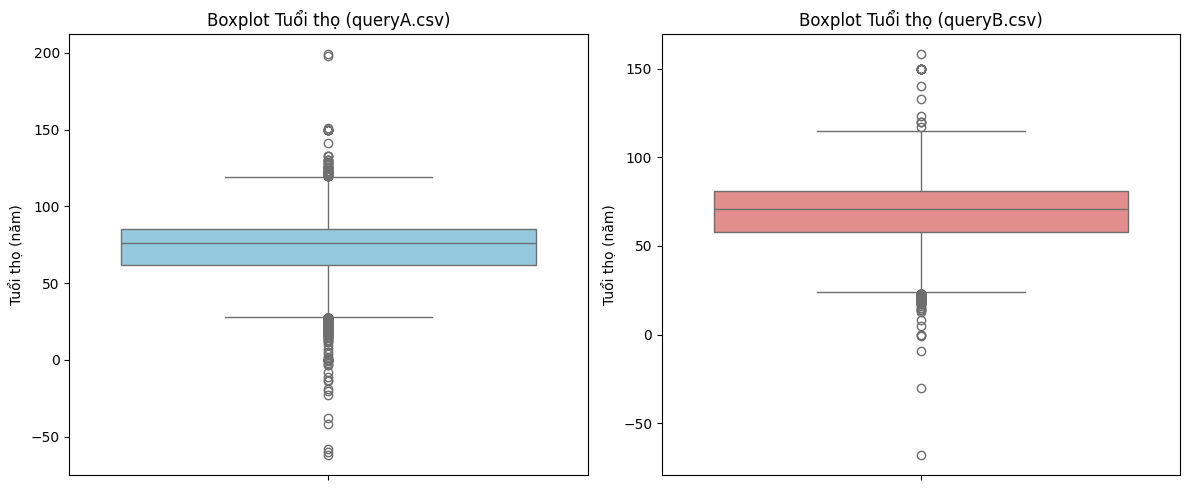

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Kiểm tra biến đã tồn tại chưa
if 'df_a_cleaned' not in globals() or 'df_b_cleaned' not in globals():
    print("Vui lòng chạy lại các cell xử lý dữ liệu (cell 1 và 2) trước khi vẽ boxplot!")
else:
    # Vẽ boxplot để xác định outlier của tuổi thọ cho từng file
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_a_cleaned['longevity'], color='skyblue')
    plt.title('Boxplot Tuổi thọ (queryA.csv)')
    plt.ylabel('Tuổi thọ (năm)')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_b_cleaned['longevity'], color='lightcoral')
    plt.title('Boxplot Tuổi thọ (queryB.csv)')
    plt.ylabel('Tuổi thọ (năm)')

    plt.tight_layout()
    plt.show()

    # Xác định các giá trị outlier theo quy tắc IQR
    def find_outliers(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return series[(series < lower_bound) | (series > upper_bound)]

    outliers_a = find_outliers(df_a_cleaned['longevity'])
    outliers_b = find_outliers(df_b_cleaned['longevity'])

 

In [12]:
# Loại bỏ outlier khỏi dữ liệu tuổi thọ bằng quy tắc IQR, nhưng giữ lại mọi giá trị trong khoảng 10-20

def remove_outliers_iqr_keep_10_20(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Giữ lại nếu nằm trong IQR hoặc nằm trong khoảng 10-20
    mask = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) | ((df[col] >= 10) & (df[col] <= 20))
    return df[mask].copy()

# Tạo DataFrame mới đã loại bỏ outlier (theo quy tắc mới)
if 'df_a_cleaned' in globals() and 'df_b_cleaned' in globals():
    df_a_no_outlier = remove_outliers_iqr_keep_10_20(df_a_cleaned, 'longevity')
    df_b_no_outlier = remove_outliers_iqr_keep_10_20(df_b_cleaned, 'longevity')
    print(f"Số lượng dòng queryA.csv sau khi loại bỏ outlier: {len(df_a_no_outlier)}")
    print(f"Số lượng dòng queryB.csv sau khi loại bỏ outlier: {len(df_b_no_outlier)}")
else:
    print("Vui lòng chạy lại các cell xử lý dữ liệu trước!")

Số lượng dòng queryA.csv sau khi loại bỏ outlier: 18713
Số lượng dòng queryB.csv sau khi loại bỏ outlier: 8620


In [13]:
# Tính tuổi thọ trung bình của từng file (dùng dữ liệu đã loại bỏ outlier nếu có)
if 'df_a_no_outlier' in globals() and 'df_b_no_outlier' in globals():
    mean_longevity_a = df_a_no_outlier['longevity'].mean()
    mean_longevity_b = df_b_no_outlier['longevity'].mean()
    print("Đang sử dụng dữ liệu đã loại bỏ outlier!")
else:
    mean_longevity_a = df_a_cleaned['longevity'].mean()
    mean_longevity_b = df_b_cleaned['longevity'].mean()
    print("Cảnh báo: Đang sử dụng dữ liệu gốc, có thể còn outlier!")

print(f"Tuổi thọ trung bình của queryA.csv: {mean_longevity_a:.2f} năm")
print(f"Tuổi thọ trung bình của queryB.csv: {mean_longevity_b:.2f} năm")

# Tính phần trăm chênh lệch
# Hoặc (Tuổi thọ A - Tuổi thọ B) / Tuổi thọ B * 100%
percentage_diff_reverse = ((mean_longevity_a - mean_longevity_b) / mean_longevity_b) * 100
print(f"Tuổi thọ trung bình của queryA.csv hơn queryB.csv khoảng: {percentage_diff_reverse:.2f}% (âm nếu ít hơn)")

# Calculate average year of death after removing outliers
if 'df_a_no_outlier' in globals() and 'df_b_no_outlier' in globals():
    avg_year_death_a = df_a_no_outlier['dateOfDeath'].dt.year.mean()
    avg_year_death_b = df_b_no_outlier['dateOfDeath'].dt.year.mean()
    print(f"Average year of death (Non-Contact): {avg_year_death_a:.2f}")
    print(f"Average year of death (Contact): {avg_year_death_b:.2f}")
else:
    print("No cleaned data available. Please run the outlier removal cell first.")

Đang sử dụng dữ liệu đã loại bỏ outlier!
Tuổi thọ trung bình của queryA.csv: 72.76 năm
Tuổi thọ trung bình của queryB.csv: 68.08 năm
Tuổi thọ trung bình của queryA.csv hơn queryB.csv khoảng: 6.88% (âm nếu ít hơn)
Average year of death (Non-Contact): 1989.03
Average year of death (Contact): 1989.35


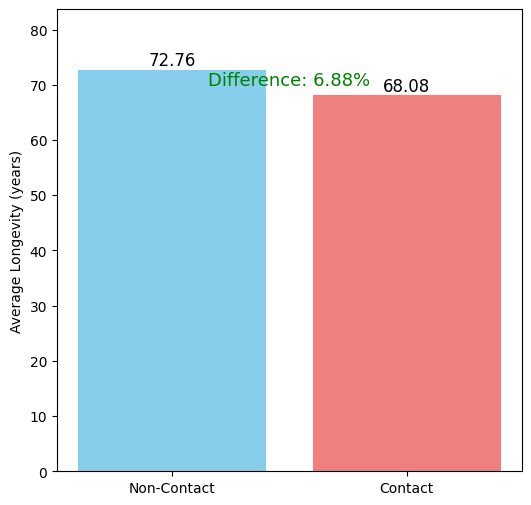

In [14]:
import matplotlib.pyplot as plt

# Sử dụng giá trị đã tính ở cell trước
labels = ['Non-Contact', 'Contact']
means = [mean_longevity_a, mean_longevity_b]

plt.figure(figsize=(6, 6))
bars = plt.bar(labels, means, color=['skyblue', 'lightcoral'])
plt.ylabel('Average Longevity (years)')


# Hiển thị giá trị trên đầu cột
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{mean:.2f}', ha='center', va='bottom', fontsize=12)

# Hiển thị phần trăm chênh lệch giữa hai cột
plt.text(0.5, max(means)*0.95, f"Difference: {percentage_diff_reverse:.2f}%", ha='center', va='bottom', fontsize=13, color='green')

plt.ylim(0, max(means)*1.15)
plt.show()

Using data with outliers removed!


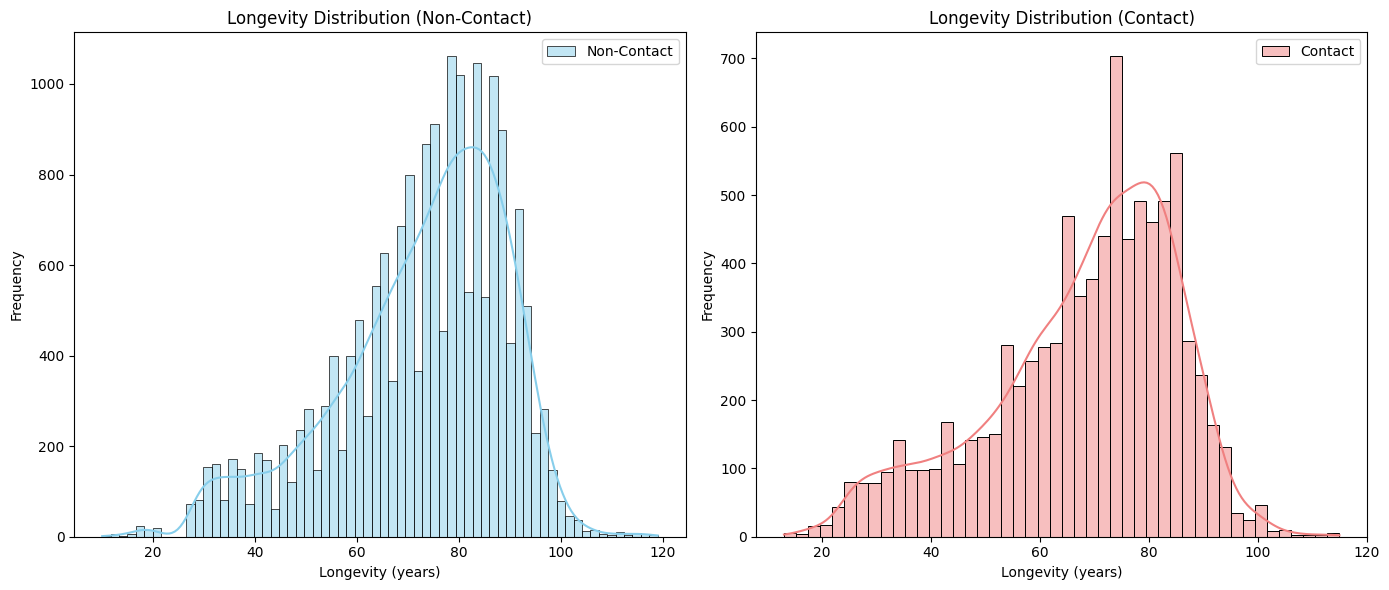

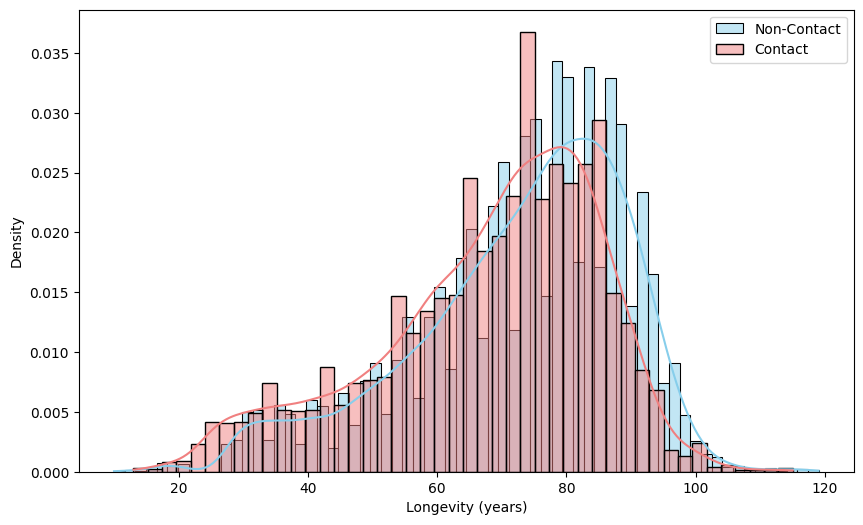

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33808\160616887.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='longevity', data=df_combined, palette={'Non-Contact': 'skyblue', 'Contact': 'lightcoral'})


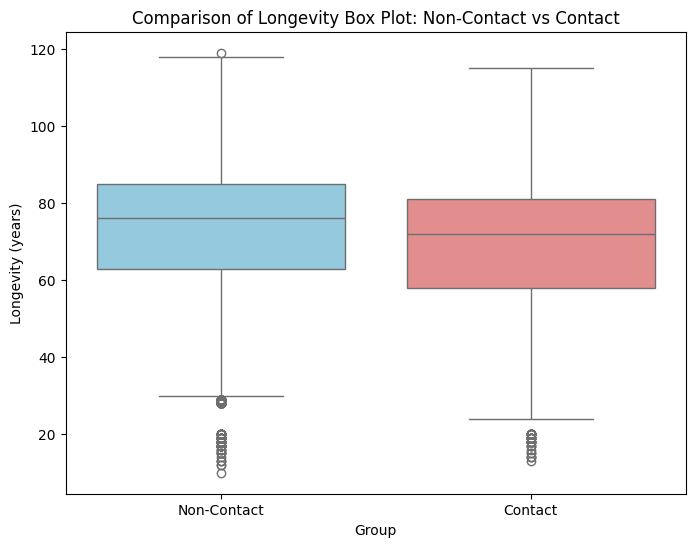

In [15]:
import seaborn as sns

# Use data with outliers removed if available
if 'df_a_no_outlier' in globals() and 'df_b_no_outlier' in globals():
    df_a_plot = df_a_no_outlier
    df_b_plot = df_b_no_outlier
    print("Using data with outliers removed!")
else:
    df_a_plot = df_a_cleaned
    df_b_plot = df_b_cleaned
    print("Warning: Using original data, outliers may still exist!")

# 1. Histogram and KDE Plot to compare longevity distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_a_plot['longevity'], kde=True, color='skyblue', label='Non-Contact')
plt.title('Longevity Distribution (Non-Contact)')
plt.xlabel('Longevity (years)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df_b_plot['longevity'], kde=True, color='lightcoral', label='Contact')
plt.title('Longevity Distribution (Contact)')
plt.xlabel('Longevity (years)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Overlayed histogram for easier comparison
plt.figure(figsize=(10, 6))
sns.histplot(df_a_plot['longevity'], kde=True, color='skyblue', label='Non-Contact', alpha=0.5, stat='density')
sns.histplot(df_b_plot['longevity'], kde=True, color='lightcoral', label='Contact', alpha=0.5, stat='density')

plt.xlabel('Longevity (years)')
plt.ylabel('Density')
plt.legend()
plt.show()

# 2. Box Plot to compare longevity
# Combine data for boxplot
df_combined = pd.DataFrame({
    'longevity': pd.concat([df_a_plot['longevity'], df_b_plot['longevity']]),
    'Group': ['Non-Contact'] * len(df_a_plot) + ['Contact'] * len(df_b_plot)
})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='longevity', data=df_combined, palette={'Non-Contact': 'skyblue', 'Contact': 'lightcoral'})
plt.title('Comparison of Longevity Box Plot: Non-Contact vs Contact')
plt.xlabel('Group')
plt.ylabel('Longevity (years)')
plt.show()

In [16]:
# Đếm số lượng vận động viên của từng môn thể thao từ df_a_no_outlier và df_b_no_outlier
if 'df_a_no_outlier' in globals() and 'df_b_no_outlier' in globals():
    print('--- Số lượng vận động viên theo môn thể thao (queryA - đã loại outlier) ---')
    print(df_a_no_outlier['occupationOrSportLabel'].value_counts())
    print('\n--- Số lượng vận động viên theo môn thể thao (queryB - đã loại outlier) ---')
    print(df_b_no_outlier['occupationOrSportLabel'].value_counts())
else:
    print('Vui lòng chạy các cell xử lý dữ liệu và loại outlier trước!')

--- Số lượng vận động viên theo môn thể thao (queryA - đã loại outlier) ---
athletics       10644
swimming         2669
tennis           2412
golf             1489
table tennis      599
badminton         591
gymnastics        291
cycling            18
Name: occupationOrSportLabel, dtype: int64

--- Số lượng vận động viên theo môn thể thao (queryB - đã loại outlier) ---
association football         6759
Australian rules football     830
ice hockey                    818
judo                          100
wrestling                      70
karate                         19
mixed martial arts             15
Muay Thai                       9
Name: occupationOrSportLabel, dtype: int64


In [17]:
# Tính tuổi thọ trung bình của từng môn thể thao trong df_a_no_outlier và df_b_no_outlier
if 'df_a_no_outlier' in globals() and 'df_b_no_outlier' in globals():
    print('--- Tuổi thọ trung bình theo môn thể thao (queryA - đã loại outlier) ---')
    print(df_a_no_outlier.groupby('occupationOrSportLabel')['longevity'].mean().sort_values(ascending=False))
    print('\n--- Tuổi thọ trung bình theo môn thể thao (queryB - đã loại outlier) ---')
    print(df_b_no_outlier.groupby('occupationOrSportLabel')['longevity'].mean().sort_values(ascending=False))
else:
    print('Vui lòng chạy các cell xử lý dữ liệu và loại outlier trước!')

--- Tuổi thọ trung bình theo môn thể thao (queryA - đã loại outlier) ---
occupationOrSportLabel
cycling         81.111111
badminton       74.663283
tennis          74.104478
golf            72.939557
athletics       72.653138
gymnastics      71.890034
table tennis    71.757930
swimming        71.730236
Name: longevity, dtype: float64

--- Tuổi thọ trung bình theo môn thể thao (queryB - đã loại outlier) ---
occupationOrSportLabel
wrestling                    70.771429
Australian rules football    70.500000
association football         68.318094
ice hockey                   65.077017
judo                         60.730000
karate                       57.842105
Muay Thai                    51.666667
mixed martial arts           47.400000
Name: longevity, dtype: float64


--- Bảng số liệu chi tiết dùng để vẽ biểu đồ ---
             Môn thể thao  Tuổi thọ trung bình        Nhóm
                  cycling                81.11 Non-Contact
                badminton                74.66 Non-Contact
                   tennis                74.10 Non-Contact
                     golf                72.94 Non-Contact
                athletics                72.65 Non-Contact
               gymnastics                71.89 Non-Contact
             table tennis                71.76 Non-Contact
                 swimming                71.73 Non-Contact
                wrestling                70.77     Contact
Australian rules football                70.50     Contact
     association football                68.32     Contact
               ice hockey                65.08     Contact
                     judo                60.73     Contact
                   karate                57.84     Contact
                Muay Thai                51.67     Contact
       

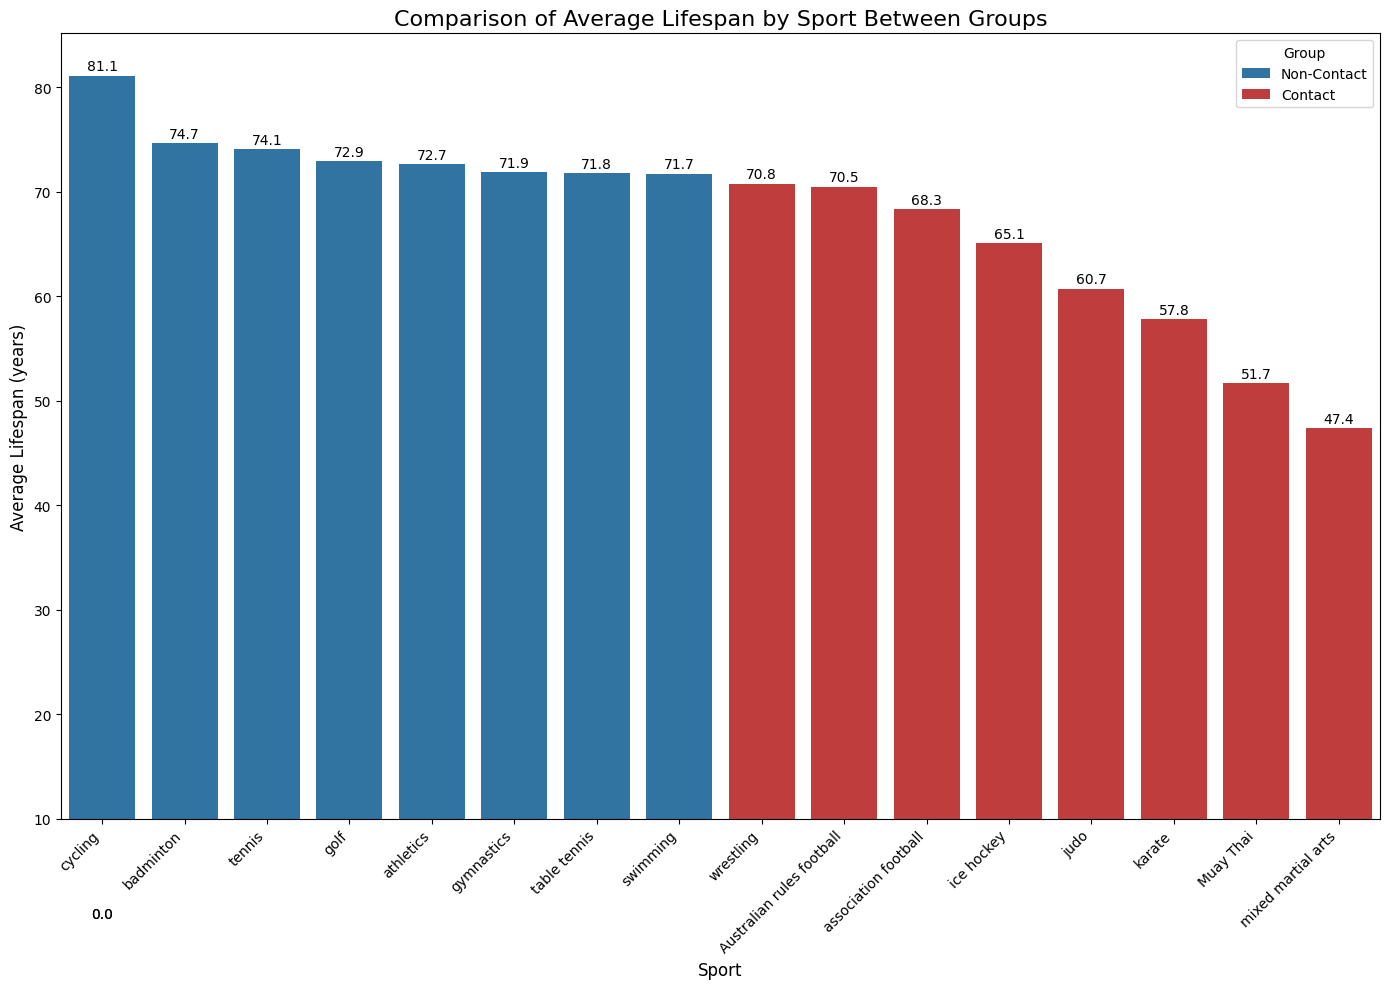

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Barplot so sánh tuổi thọ trung bình của tất cả các môn thể thao giữa hai nhóm, sắp xếp theo từng nhóm

def plot_combined_barplot_sorted(df_a, df_b):
    # Tính tuổi thọ trung bình từng môn
    mean_a = df_a.groupby('occupationOrSportLabel')['longevity'].mean().sort_values(ascending=False)
    mean_b = df_b.groupby('occupationOrSportLabel')['longevity'].mean().sort_values(ascending=False)

    # Tạo DataFrame chung
    df_plot = pd.concat([
        pd.DataFrame({'sport': mean_a.index, 'mean_longevity': mean_a.values, 'group': 'Non-Contact'}),
        pd.DataFrame({'sport': mean_b.index, 'mean_longevity': mean_b.values, 'group': 'Contact'})
    ], ignore_index=True)

    # --- BẮT ĐẦU PHẦN CODE MỚI ĐỂ IN SỐ LIỆU ---
    print("--- Bảng số liệu chi tiết dùng để vẽ biểu đồ ---")
    
    # Tạo một bản sao để hiển thị cho đẹp, không ảnh hưởng đến dữ liệu vẽ biểu đồ
    df_display = df_plot.copy()
    
    # Đổi tên cột sang tiếng Việt
    df_display.rename(columns={
        'sport': 'Môn thể thao',
        'mean_longevity': 'Tuổi thọ trung bình',
        'group': 'Nhóm'
    }, inplace=True)
    
    # Làm tròn số liệu tuổi thọ cho dễ đọc
    df_display['Tuổi thọ trung bình'] = df_display['Tuổi thọ trung bình'].round(2)
    
    # In ra toàn bộ bảng, to_string() giúp hiển thị đẹp và không bị cắt bớt
    # index=False để bỏ cột chỉ số (0, 1, 2...) không cần thiết
    print(df_display.to_string(index=False))
    print("-------------------------------------------------\n")
    # --- KẾT THÚC PHẦN CODE MỚI ---

    # Sắp xếp thứ tự các môn thể thao: Non-Contact trước, Contact sau, mỗi nhóm theo thứ tự giảm dần longevity
    order = list(mean_a.index) + list(mean_b.index)

    # Đánh dấu màu theo nhóm
    palette = {'Non-Contact': '#1f77b4', 'Contact': '#d62728'}

    plt.figure(figsize=(14, 10))
    ax = sns.barplot(
        data=df_plot,
        x='sport', y='mean_longevity', hue='group',
        order=order,
        palette=palette
    )
    # --- PHẦN MỚI: THÊM SỐ LIỆU LÊN TRÊN CÁC CỘT ---
    for p in ax.patches:
        height = p.get_height()
        # Ghi số liệu lên trên cột, làm tròn 1 chữ số, căn giữa
        ax.text(x = p.get_x() + p.get_width() / 2.,
                y = height + 0.5, # Đặt nhãn cao hơn đỉnh cột một chút
                s = f'{height:.1f}', # Format số liệu
                ha = 'center')
    # --- KẾT THÚC PHẦN MỚI ---

    # --- PHẦN MỚI: CHUYỂN CÁC NHÃN SANG TIẾNG ANH ---
    plt.title('Comparison of Average Lifespan by Sport Between Groups', fontsize=16)
    plt.xlabel('Sport', fontsize=12)
    plt.ylabel('Average Lifespan (years)', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Xoay nhãn trục X và căn lề phải cho đẹp hơn
    plt.legend(title='Group')

    # Đặt giới hạn dưới của trục Y là 40 để "zoom" vào phần cần quan tâm
    ax.set_ylim(bottom=10)
    
    plt.tight_layout()
    plt.show()

if 'df_a_no_outlier' in globals() and 'df_b_no_outlier' in globals():
    plot_combined_barplot_sorted(df_a_no_outlier, df_b_no_outlier)
else:
    print('Vui lòng chạy các cell xử lý dữ liệu và loại outlier trước!')

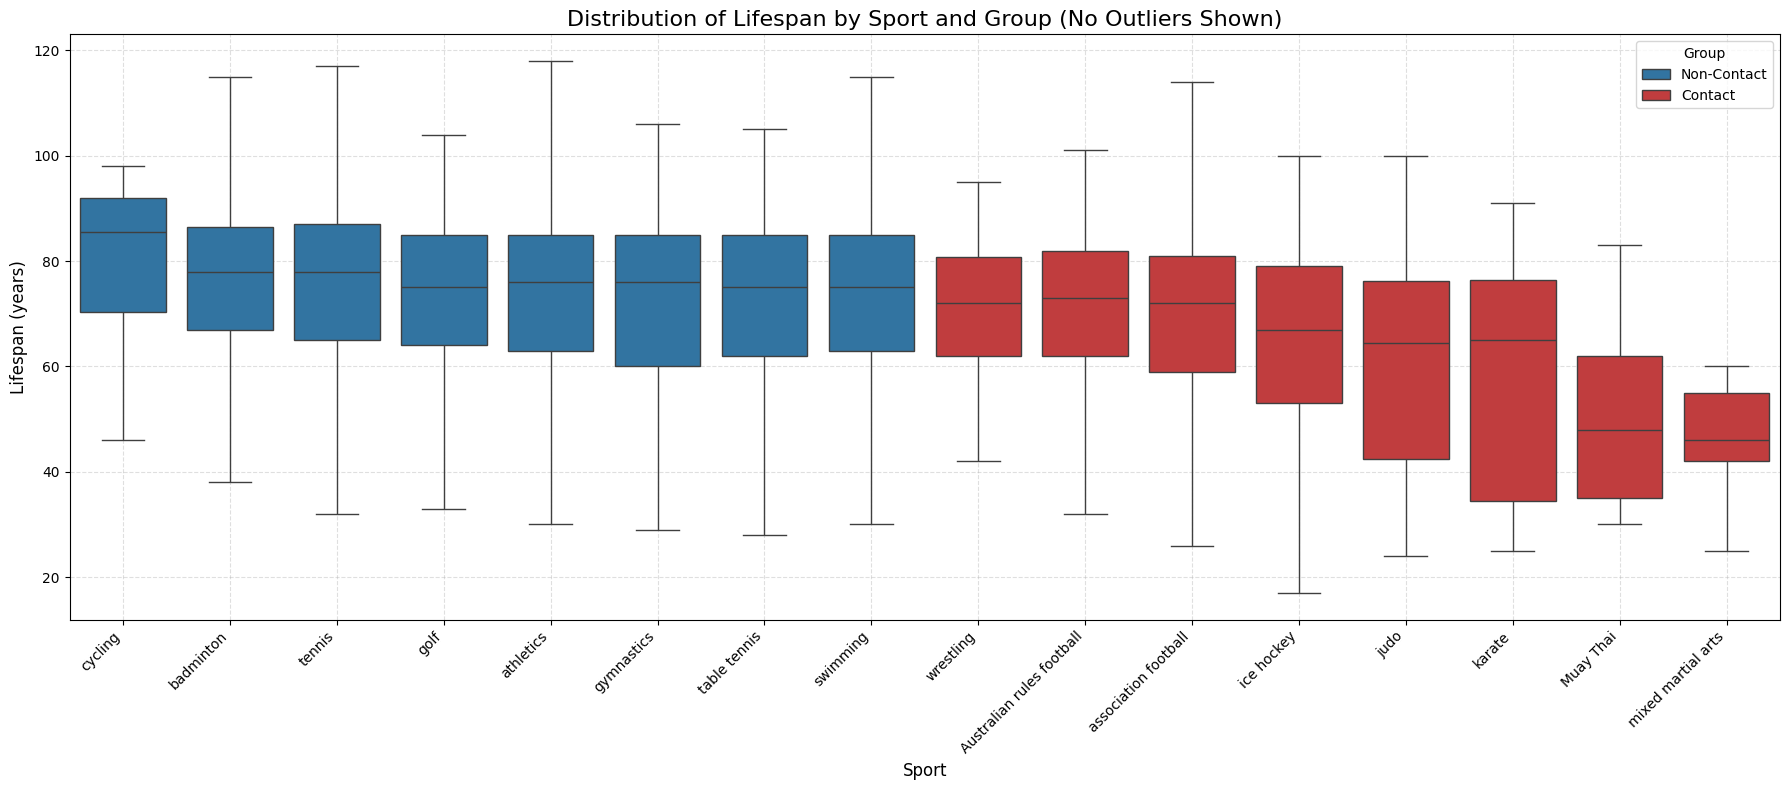

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Gộp dữ liệu từng cá nhân từ hai nhóm
if 'df_a_no_outlier' in globals() and 'df_b_no_outlier' in globals():
    df_a_no_outlier = df_a_no_outlier.copy()
    df_b_no_outlier = df_b_no_outlier.copy()
    df_a_no_outlier['group'] = 'Non-Contact'
    df_b_no_outlier['group'] = 'Contact'
    df_full = pd.concat([df_a_no_outlier, df_b_no_outlier], ignore_index=True)
else:
    print('Vui lòng chạy các cell xử lý dữ liệu và loại outlier trước!')
    df_full = None

if df_full is not None:
    # Sắp xếp thứ tự môn thể thao theo tuổi thọ trung bình giảm dần
    order = list(df_full.groupby('occupationOrSportLabel')['longevity'].mean().sort_values(ascending=False).index)
    palette = {'Non-Contact': '#1f77b4', 'Contact': '#d62728'}

    plt.figure(figsize=(18, 8))
    ax = sns.boxplot(
        data=df_full,
        x='occupationOrSportLabel',
        y='longevity',
        hue='group',
        order=order,
        palette=palette,
        dodge=False, # Đặt dodge=False để các nhóm xếp chồng lên nhau
        showfliers=False # Ẩn outlier trên boxplot
    )
    plt.title('Distribution of Lifespan by Sport and Group (No Outliers Shown)', fontsize=16)
    plt.xlabel('Sport', fontsize=12)
    plt.ylabel('Lifespan (years)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Group')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

In [20]:
from scipy.stats import ttest_ind
import pandas as pd

# Phân tích kiểm định t-test giữa hai nhóm thể thao
# Sử dụng dữ liệu đã loại outlier
if 'df_a_no_outlier' in globals() and 'df_b_no_outlier' in globals():
    longevity_a = df_a_no_outlier['longevity']
    longevity_b = df_b_no_outlier['longevity']
    N_a = len(longevity_a)
    N_b = len(longevity_b)
    mean_a = longevity_a.mean()
    mean_b = longevity_b.mean()
    std_a = longevity_a.std()
    std_b = longevity_b.std()
    # Thực hiện t-test độc lập (không giả định phương sai bằng nhau)
    t_stat, p_value = ttest_ind(longevity_a, longevity_b, equal_var=False)
    # Bậc tự do xấp xỉ theo Welch-Satterthwaite
    s1 = std_a**2 / N_a
    s2 = std_b**2 / N_b
    df = (s1 + s2)**2 / ((s1**2)/(N_a-1) + (s2**2)/(N_b-1))
    # Kết luận
    conclusion = ["Significant" if p_value < 0.05 else "Not significant"]*2
    # Tạo bảng kết quả
    result_df = pd.DataFrame({
        'Group': ['Non-Contact', 'Contact'],
        'N': [N_a, N_b],
        'Mean (M)': [round(mean_a,2), round(mean_b,2)],
        'Std (SD)': [round(std_a,2), round(std_b,2)],
        't': [round(t_stat,2), ''],
        'df': [int(round(df)), ''],
        'p': [f"{p_value:.4f}" if p_value>=0.001 else '< 0.001', ''],
        'Conclusion': conclusion
    })
    print("T-test result table:")
    print(result_df.to_string(index=False))
else:
    print('Please run the data cleaning and outlier removal cells first!')


T-test result table:
      Group     N  Mean (M)  Std (SD)     t    df       p  Conclusion
Non-Contact 18713     72.76     16.65  21.1 16230 < 0.001 Significant
    Contact  8620     68.08     17.25                     Significant


C:\Users\ASUS\AppData\Local\Temp\ipykernel_37920\3015823448.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='longevity', data=df_box, palette={'Non-Contact': 'skyblue', 'Contact': 'lightcoral'}, showfliers=False)


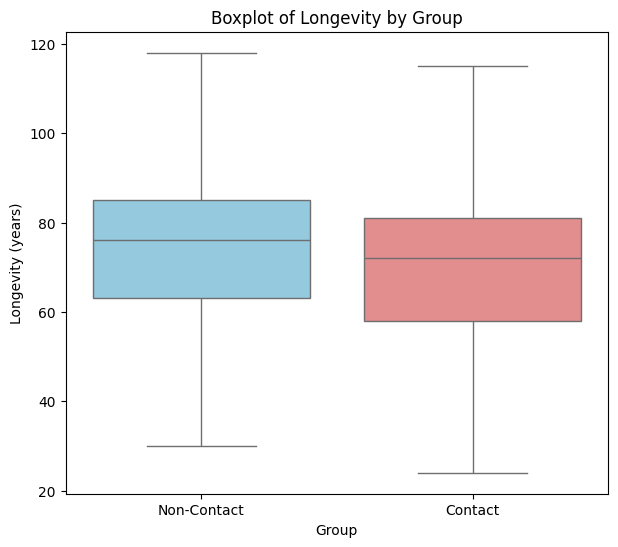

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Boxplot so sánh longevity giữa hai nhóm
if 'df_a_no_outlier' in globals() and 'df_b_no_outlier' in globals():
    # Gộp dữ liệu và gán nhãn nhóm
    df_a_no_outlier = df_a_no_outlier.copy()
    df_b_no_outlier = df_b_no_outlier.copy()
    df_a_no_outlier['Group'] = 'Non-Contact'
    df_b_no_outlier['Group'] = 'Contact'
    df_box = pd.concat([df_a_no_outlier, df_b_no_outlier], ignore_index=True)
    
    plt.figure(figsize=(7, 6))
    sns.boxplot(x='Group', y='longevity', data=df_box, palette={'Non-Contact': 'skyblue', 'Contact': 'lightcoral'}, showfliers=False)
    plt.title('Boxplot of Longevity by Group')
    plt.xlabel('Group')
    plt.ylabel('Longevity (years)')
    plt.show()
else:
    print('Vui lòng chạy các cell xử lý dữ liệu và loại outlier trước!')

In [6]:
# Scatter plot + linear regression cho Career Duration vs Longevity
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

df = pd.read_csv('carrerTime.csv')


In [8]:
print(df["occupationOrSportLabel"].value_counts())


occupationOrSportLabel
association football           2753
association football player    2716
basketball player              1266
basketball                     1265
tennis                          207
                               ... 
beach volleyball                  1
shot putter                       1
discus thrower                    1
speedway rider                    1
kickboxer                         1
Name: count, Length: 245, dtype: int64


In [ ]:

# Dùng dữ liệu đã loại outlier nếu có, nếu không thì dùng dữ liệu đã làm sạch
df_a_plot = df_a_no_outlier if 'df_a_no_outlier' in globals() else df_a_cleaned
df_b_plot = df_b_no_outlier if 'df_b_no_outlier' in globals() else df_b_cleaned

# Kiểm tra cột career_duration
if 'career_duration' not in df_a_plot.columns or 'career_duration' not in df_b_plot.columns:
    print("Dữ liệu chưa có cột 'career_duration'. Vui lòng thêm cột này vào DataFrame!")
else:
    plt.figure(figsize=(10, 7))
    # Vẽ scatter plot
    plt.scatter(df_a_plot['career_duration'], df_a_plot['longevity'], alpha=0.6, color='blue', label='non-contact')
    plt.scatter(df_b_plot['career_duration'], df_b_plot['longevity'], alpha=0.6, color='orange', label='contact')
    # Linear regression cho từng nhóm
    for df, color, label in zip([df_a_plot, df_b_plot], ['blue', 'orange'], ['non-contact', 'contact']):
        x = df['career_duration']
        y = df['longevity']
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        y_pred = slope * x + intercept
        plt.plot(x, y_pred, color=color, label=f'{label} fit')
        # Confidence interval
        n = len(x)
        mean_x = np.mean(x)
        se = np.sqrt(np.sum((y - y_pred) ** 2) / (n-2) / np.sum((x - mean_x) ** 2))
        alpha = 0.05
        t_value = stats.t.ppf(1-alpha/2, n-2)
        ci = t_value * se * np.sqrt(1 + (x - mean_x)**2 / np.sum((x - mean_x)**2))
        plt.fill_between(x, y_pred - ci, y_pred + ci, color=color, alpha=0.15)
    plt.xlabel('Career Duration (years)')
    plt.ylabel('Longevity (years)')
    plt.title('Scatter Plot with Linear Regression: Career Duration vs Longevity')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


Tổng số dòng sau khi gộp: 400
Tổng số dòng sau khi gộp: 400


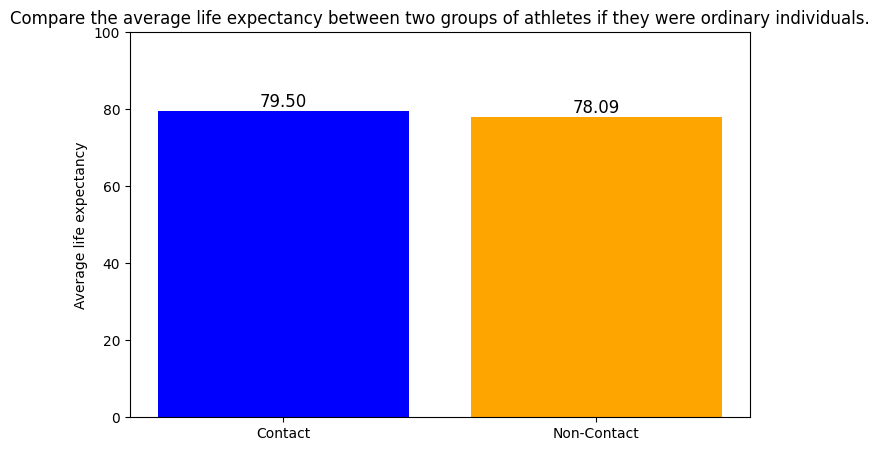

In [30]:
import plotly.express as px
import pandas as pd
from geopy.geocoders import Nominatim


# ===== 1. Đọc và gộp tất cả file =====
a = [1,2,3,4,5,6,7,16]
b = [8,9,10,11,12,13,14,15]

files = [f"query ({i}).csv" for i in a]
dfa = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
print(f"Tổng số dòng sau khi gộp: {len(df)}")

files = [f"query ({i}).csv" for i in b]
dfb = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
print(f"Tổng số dòng sau khi gộp: {len(df)}")
# Kiểm tra cột tồn tại


import pandas as pd
import matplotlib.pyplot as plt




# Đọc dữ liệu tuổi thọ
life_df = pd.read_csv('countries.csv')  # giả sử có cột 'Country' và 'Life Expectancy'

# Ghép dữ liệu theo quốc gia
merged_df = df.merge(life_df, on='countryLabel', how='left')




# Ghép dữ liệu theo quốc gia
merged_a = dfa.merge(life_df, on='countryLabel', how='left')
merged_b = dfb.merge(life_df, on='countryLabel', how='left')

# Tính tuổi thọ trung bình cho mỗi nhóm
avg_a = merged_a['lifeExpectancy'].mean()
avg_b = merged_b['lifeExpectancy'].mean()

# Tạo DataFrame để trực quan hóa
compare_df = pd.DataFrame({
    'Group': ['Contact', 'Non-Contact'],
    'Average Life Expectancy': [avg_a, avg_b]
})

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(compare_df['Group'], compare_df['Average Life Expectancy'], color=['blue', 'orange'])
plt.title('Compare the average life expectancy between two groups of athletes if they were ordinary individuals.')
plt.ylabel('Average life expectancy')
plt.ylim(0, 100)

# Hiển thị giá trị trên cột
for i, v in enumerate(compare_df['Average Life Expectancy']):
    plt.text(i, v + 1, f"{v:.2f}", ha='center', fontsize=12)

plt.show()




In [19]:
import plotly.express as px
import pandas as pd
from geopy.geocoders import Nominatim
import time
import random

# ===== 1. Đọc và gộp tất cả file =====
a = [1,2,3,4,5,6,7,16]
b = [8,9,10,11,12,13,14,15]
files = [f"query ({i}).csv" for i in a]
df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
print(f"Tổng số dòng sau khi gộp: {len(df)}")

# Kiểm tra cột tồn tại
if 'countryLabel' not in df.columns or 'sportLabel' not in df.columns:
    raise ValueError("Các file CSV phải có cột 'countryLabel' và 'sportLabel'.")

# ===== 2. Lấy danh sách quốc gia duy nhất =====
countries = df['countryLabel'].dropna().unique()

geolocator = Nominatim(user_agent="geoapi")

coords = {}
for country in countries:
    try:
        location = geolocator.geocode(country, timeout=5)
        if location:
            coords[country] = (location.latitude, location.longitude)
        else:
            coords[country] = (None, None)
    except Exception as e:
        print(f"Lỗi khi lấy tọa độ {country}: {e}")
        coords[country] = (None, None)
    time.sleep(1)  # tránh bị chặn

# Gán tọa độ trở lại DataFrame
df['lat'] = df['countryLabel'].map(lambda c: coords.get(c, (None, None))[0])
df['lon'] = df['countryLabel'].map(lambda c: coords.get(c, (None, None))[1])

# ===== 3. Thêm ngẫu nhiên nhẹ để tránh trùng chấm =====
from countryinfo import CountryInfo
import numpy as np

def get_country_area(country):
    try:
        info = CountryInfo(country).info()
        return info.get('area', None)
    except:
        return None

# Lấy diện tích từng quốc gia duy nhất
areas = {}
for c in df['countryLabel'].unique():
    area = get_country_area(c)
    areas[c] = area if area else 50000  # nếu không có thì gán trung bình

# Chuẩn hóa độ lệch: nước nhỏ lệch ít, nước lớn lệch nhiều
def get_jitter_scale(area):
    return 0.1 + 3 * np.log10(area) / np.log10(7098242)  # 17 triệu km² = diện tích Nga

df['jitter_scale'] = df['countryLabel'].map(lambda c: get_jitter_scale(areas.get(c, 50000)))

# Áp dụng jitter theo từng quốc gia
df['lat'] = df.apply(lambda r: r['lat'] + random.uniform(-r['jitter_scale'], r['jitter_scale']) if pd.notna(r['lat']) else r['lat'], axis=1)
df['lon'] = df.apply(lambda r: r['lon'] + random.uniform(-r['jitter_scale'], r['jitter_scale']) if pd.notna(r['lon']) else r['lon'], axis=1)


# ===== 4. Vẽ bản đồ =====
fig = px.scatter_geo(
    df,
    lat='lat',
    lon='lon',
    color='sportLabel',
    hover_name='countryLabel',
    title='Phân bố vận động viên theo môn thể thao trên thế giới',
    projection='natural earth'
)
fig.update_traces(marker=dict(size=3))
fig.update_layout(width=1000, height=700)
fig.show()


Tổng số dòng sau khi gộp: 400


In [20]:
import plotly.express as px
import pandas as pd
from geopy.geocoders import Nominatim
import time
import random

# ===== 1. Đọc và gộp tất cả file =====
a = [1,2,3,4,5,6,7,16]
b = [8,9,10,11,12,13,14,15]
files = [f"query ({i}).csv" for i in b]
df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
print(f"Tổng số dòng sau khi gộp: {len(df)}")

# Kiểm tra cột tồn tại
if 'countryLabel' not in df.columns or 'sportLabel' not in df.columns:
    raise ValueError("Các file CSV phải có cột 'countryLabel' và 'sportLabel'.")

# ===== 2. Lấy danh sách quốc gia duy nhất =====
countries = df['countryLabel'].dropna().unique()

geolocator = Nominatim(user_agent="geoapi")

coords = {}
for country in countries:
    try:
        location = geolocator.geocode(country, timeout=5)
        if location:
            coords[country] = (location.latitude, location.longitude)
        else:
            coords[country] = (None, None)
    except Exception as e:
        print(f"Lỗi khi lấy tọa độ {country}: {e}")
        coords[country] = (None, None)
    time.sleep(1)  # tránh bị chặn

# Gán tọa độ trở lại DataFrame
df['lat'] = df['countryLabel'].map(lambda c: coords.get(c, (None, None))[0])
df['lon'] = df['countryLabel'].map(lambda c: coords.get(c, (None, None))[1])

# ===== 3. Thêm ngẫu nhiên nhẹ để tránh trùng chấm =====
from countryinfo import CountryInfo
import numpy as np

def get_country_area(country):
    try:
        info = CountryInfo(country).info()
        return info.get('area', None)
    except:
        return None

# Lấy diện tích từng quốc gia duy nhất
areas = {}
for c in df['countryLabel'].unique():
    area = get_country_area(c)
    areas[c] = area if area else 50000  # nếu không có thì gán trung bình

# Chuẩn hóa độ lệch: nước nhỏ lệch ít, nước lớn lệch nhiều
def get_jitter_scale(area):
    return 0.1 + 3 * np.log10(area) / np.log10(7098242)  # 17 triệu km² = diện tích Nga

df['jitter_scale'] = df['countryLabel'].map(lambda c: get_jitter_scale(areas.get(c, 50000)))

# Áp dụng jitter theo từng quốc gia
df['lat'] = df.apply(lambda r: r['lat'] + random.uniform(-r['jitter_scale'], r['jitter_scale']) if pd.notna(r['lat']) else r['lat'], axis=1)
df['lon'] = df.apply(lambda r: r['lon'] + random.uniform(-r['jitter_scale'], r['jitter_scale']) if pd.notna(r['lon']) else r['lon'], axis=1)


# ===== 4. Vẽ bản đồ =====
fig = px.scatter_geo(
    df,
    lat='lat',
    lon='lon',
    color='sportLabel',
    hover_name='countryLabel',
    title='Phân bố vận động viên theo môn thể thao trên thế giới',
    projection='natural earth'
)
fig.update_traces(marker=dict(size=3))
fig.update_layout(width=1000, height=700)
fig.show()


Tổng số dòng sau khi gộp: 400
